## Veritas AI project EDA

In [28]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
#import data
df = pd.read_csv("../data/injury-data.csv")

In [30]:
#inspect first five rows
df.head()

,nr. sessions,nr. rest days,total kms,max km one day,total km Z3-Z4-Z5-T1-T2,"nr. tough sessions (effort in Z5, T1 or T2)",nr. days with interval session,total km Z3-4,max km Z3-4 one day,total km Z5-T1-T2,...,max training success.2,avg recovery.2,min recovery.2,max recovery.2,Athlete ID,injury,rel total kms week 0_1,rel total kms week 0_2,rel total kms week 1_2,Date
0,5.0,2.0,22.2,16.4,11.8,1.0,2.0,10.0,10.0,0.6,...,0.0,0.18,0.16,0.20,0,0,0.718447,1.378882,1.919255,0
1,5.0,2.0,21.6,16.4,11.7,1.0,2.0,10.0,10.0,0.5,...,0.0,0.18,0.16,0.20,0,0,0.683544,1.018868,1.490566,1
2,5.0,2.0,21.6,16.4,11.7,1.0,2.0,10.0,10.0,0.5,...,0.0,0.17,0.16,0.18,0,0,0.683544,1.018868,1.490566,2
3,5.0,2.0,21.6,16.4,11.7,1.0,2.0,10.0,10.0,0.5,...,0.0,0.18,0.16,0.18,0,0,0.683544,1.018868,1.490566,3
4,6.0,1.0,39.2,17.6,18.9,1.0,3.0,17.2,10.0,0.5,...,0.0,0.17,0.16,0.18,0,0,2.202247,1.361111,0.618056,4


In [31]:
#inspect last 5 rows
df.tail()

,nr. sessions,nr. rest days,total kms,max km one day,total km Z3-Z4-Z5-T1-T2,"nr. tough sessions (effort in Z5, T1 or T2)",nr. days with interval session,total km Z3-4,max km Z3-4 one day,total km Z5-T1-T2,...,max training success.2,avg recovery.2,min recovery.2,max recovery.2,Athlete ID,injury,rel total kms week 0_1,rel total kms week 0_2,rel total kms week 1_2,Date
42793,4.0,3.0,59.5,19.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.80,0.20,0.12,0.26,71,1,2.479167,1.101852,0.444444,2143
42794,1.0,6.0,5.8,5.8,0.0,0.0,0.0,0.0,0.0,0.0,...,0.85,0.12,0.12,0.12,71,1,1.054545,1.288889,1.222222,2286
42795,3.0,4.0,38.3,16.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.93,0.32,0.17,0.62,71,1,0.750980,0.743689,0.990291,2483
42796,5.0,2.0,67.0,15.1,0.0,0.0,0.0,0.0,0.0,0.0,...,0.91,0.28,0.22,0.41,71,1,2.005988,1.238447,0.617375,2647
42797,4.0,3.0,45.0,12.2,0.0,0.0,0.0,0.0,0.0,0.0,...,0.88,0.16,0.05,0.21,71,1,1.011236,1.022727,1.011364,2673


In [32]:
#sample 5 rows randomly
df.sample(5)

,nr. sessions,nr. rest days,total kms,max km one day,total km Z3-Z4-Z5-T1-T2,"nr. tough sessions (effort in Z5, T1 or T2)",nr. days with interval session,total km Z3-4,max km Z3-4 one day,total km Z5-T1-T2,...,max training success.2,avg recovery.2,min recovery.2,max recovery.2,Athlete ID,injury,rel total kms week 0_1,rel total kms week 0_2,rel total kms week 1_2,Date
9970,8.0,0.0,79.9,16.0,31.9,3.0,5.0,17.5,9.5,14.4,...,0.85,0.16,0.10,0.20,20,0,0.987639,1.007566,1.020177,844
41070,8.0,0.0,81.0,16.8,21.4,2.0,3.0,8.1,8.1,12.6,...,0.71,0.58,0.45,0.79,69,0,1.225416,1.084337,0.884873,2617
34335,6.0,1.0,49.0,12.0,10.0,1.0,3.0,7.0,4.0,3.0,...,0.51,0.49,0.48,0.51,54,0,4.454545,1.189320,0.266990,1536
14323,4.0,3.0,33.0,12.5,15.1,3.0,3.0,3.0,3.0,10.8,...,0.00,0.16,0.14,0.17,24,0,0.688935,0.653465,0.948515,159
14228,6.0,1.0,66.0,13.4,8.5,2.0,2.0,0.0,0.0,8.0,...,0.00,0.15,0.14,0.16,24,0,1.096345,1.074919,0.980456,64


In [33]:
#inspect data shape
df.shape

(42798, 72)

In [34]:
#inspect data columns
df.columns

Index(['nr. sessions', 'nr. rest days', 'total kms', 'max km one day',
       'total km Z3-Z4-Z5-T1-T2',
       'nr. tough sessions (effort in Z5, T1 or T2)',
       'nr. days with interval session', 'total km Z3-4',
       'max km Z3-4 one day', 'total km Z5-T1-T2', 'max km Z5-T1-T2 one day',
       'total hours alternative training', 'nr. strength trainings',
       'avg exertion', 'min exertion', 'max exertion', 'avg training success',
       'min training success', 'max training success', 'avg recovery',
       'min recovery', 'max recovery', 'nr. sessions.1', 'nr. rest days.1',
       'total kms.1', 'max km one day.1', 'total km Z3-Z4-Z5-T1-T2.1',
       'nr. tough sessions (effort in Z5, T1 or T2).1',
       'nr. days with interval session.1', 'total km Z3-4.1',
       'max km Z3-4 one day.1', 'total km Z5-T1-T2.1',
       'max km Z5-T1-T2 one day.1', 'total hours alternative training.1',
       'nr. strength trainings.1', 'avg exertion.1', 'min exertion.1',
       'max exertion.

In [35]:
df.dtypes

nr. sessions               float64
nr. rest days              float64
total kms                  float64
max km one day             float64
total km Z3-Z4-Z5-T1-T2    float64
                            ...   
injury                       int64
rel total kms week 0_1     float64
rel total kms week 0_2     float64
rel total kms week 1_2     float64
Date                         int64
Length: 72, dtype: object

In [36]:
df.describe()

,nr. sessions,nr. rest days,total kms,max km one day,total km Z3-Z4-Z5-T1-T2,"nr. tough sessions (effort in Z5, T1 or T2)",nr. days with interval session,total km Z3-4,max km Z3-4 one day,total km Z5-T1-T2,...,max training success.2,avg recovery.2,min recovery.2,max recovery.2,Athlete ID,injury,rel total kms week 0_1,rel total kms week 0_2,rel total kms week 1_2,Date
count,42798.000000,42798.000000,42798.000000,42798.000000,42798.000000,42798.000000,42798.000000,42798.000000,42798.000000,42798.000000,...,42798.000000,42798.000000,42798.000000,42798.000000,42798.000000,42798.000000,4.279800e+04,4.279800e+04,4.279800e+04,42798.000000
mean,5.809337,1.874667,49.543911,14.009255,9.433621,0.930184,1.672531,4.859398,3.456888,4.063970,...,0.525709,0.255089,0.184927,0.343522,34.538249,0.013435,4.408628e+05,9.014685e+05,4.803623e+05,1227.733422
std,2.484234,1.853287,36.715017,9.071678,8.887120,1.040631,1.263528,6.984670,4.577423,5.645305,...,0.390604,0.153214,0.127996,0.219536,19.020826,0.115130,4.328234e+06,6.945503e+06,4.656806e+06,806.495152
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,5.000000,1.000000,22.800000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.150000,0.110000,0.170000,20.000000,0.000000,6.955245e-01,6.723968e-01,6.923077e-01,437.000000
50%,6.000000,1.000000,44.800000,13.400000,8.000000,1.000000,2.000000,0.000000,0.000000,1.500000,...,0.730000,0.220000,0.160000,0.310000,34.000000,0.000000,9.891862e-01,1.001431e+00,9.897523e-01,1254.000000
75%,7.000000,3.000000,70.100000,18.300000,14.600000,2.000000,3.000000,8.000000,6.300000,6.300000,...,0.840000,0.360000,0.240000,0.520000,50.000000,0.000000,1.320515e+00,1.422171e+00,1.327586e+00,1913.000000
max,14.000000,7.000000,242.000000,131.000000,100.000000,6.000000,7.000000,79.800000,75.000000,80.000000,...,1.000000,0.900000,0.900000,1.000000,73.000000,1.000000,2.096000e+08,2.176000e+08,2.096000e+08,2673.000000


In [37]:
#Missing values
df.isnull().sum().sum()

0

In [38]:
#Duplicate entries
num_duplicates = df.duplicated().sum()
num_duplicates

0

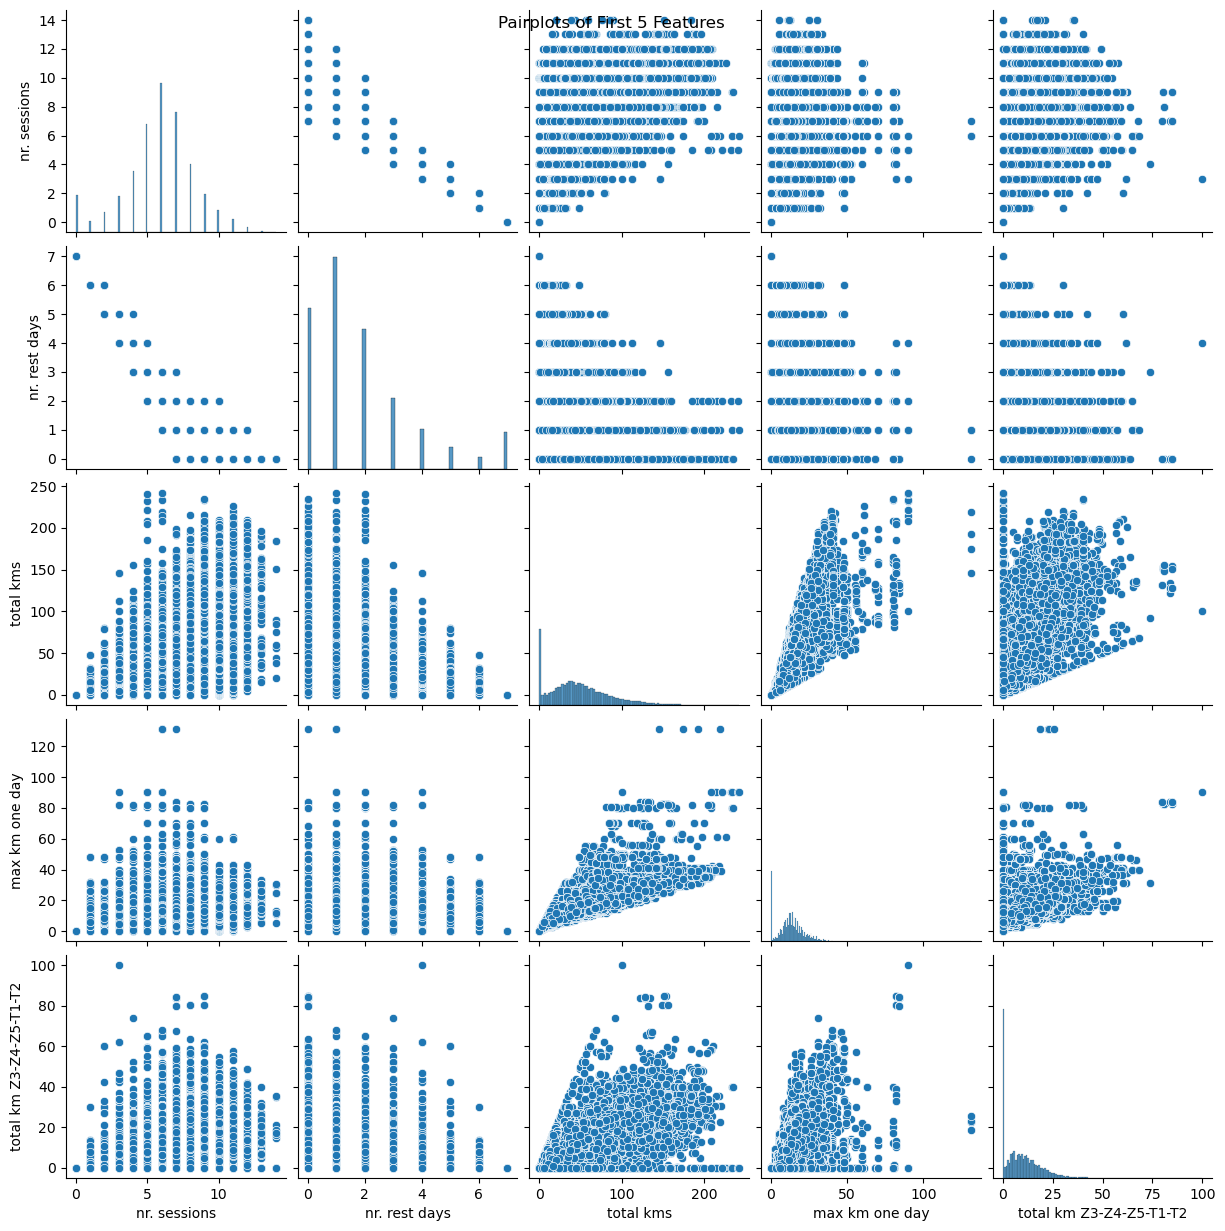

In [39]:
sns.pairplot(df.iloc[:, :5])  # Showing pairplots for the first 5 features for simplicity
plt.suptitle('Pairplots of First 5 Features')
plt.show()

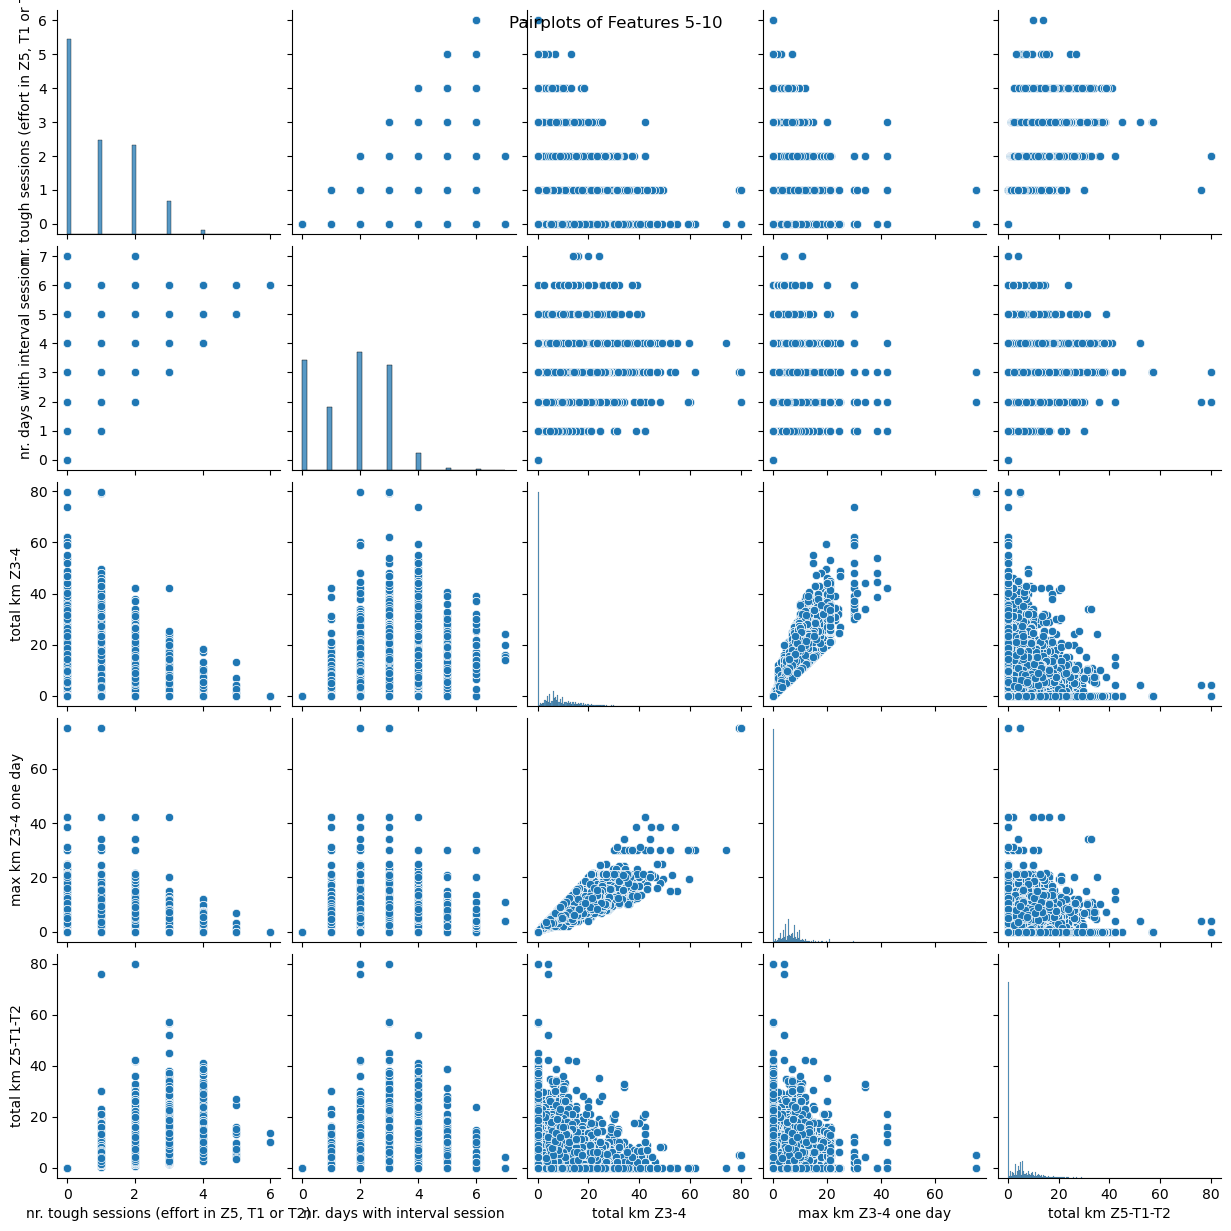

In [46]:
#colunms 6-10
sns.pairplot(df.iloc[:, 5:10])  # Showing pairplots for the first 5 features for simplicity
plt.suptitle('Pairplots of Features 5-10')
plt.show()

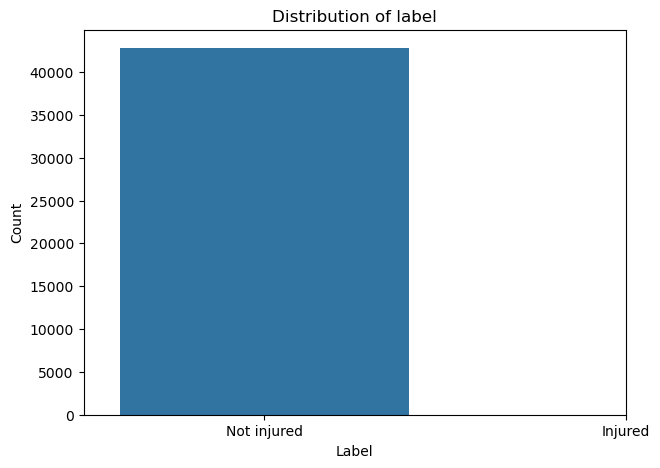

In [40]:
# Target distribution
plt.figure(figsize=(7, 5))
sns.countplot(df['injury'])
plt.title('Distribution of label')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Not injured', 'Injured'])
plt.show()

In [41]:
#Amount of noninjured and injured
unique_counts = df['injury'].value_counts()
unique_counts

0    42223
1      575
Name: injury, dtype: int64

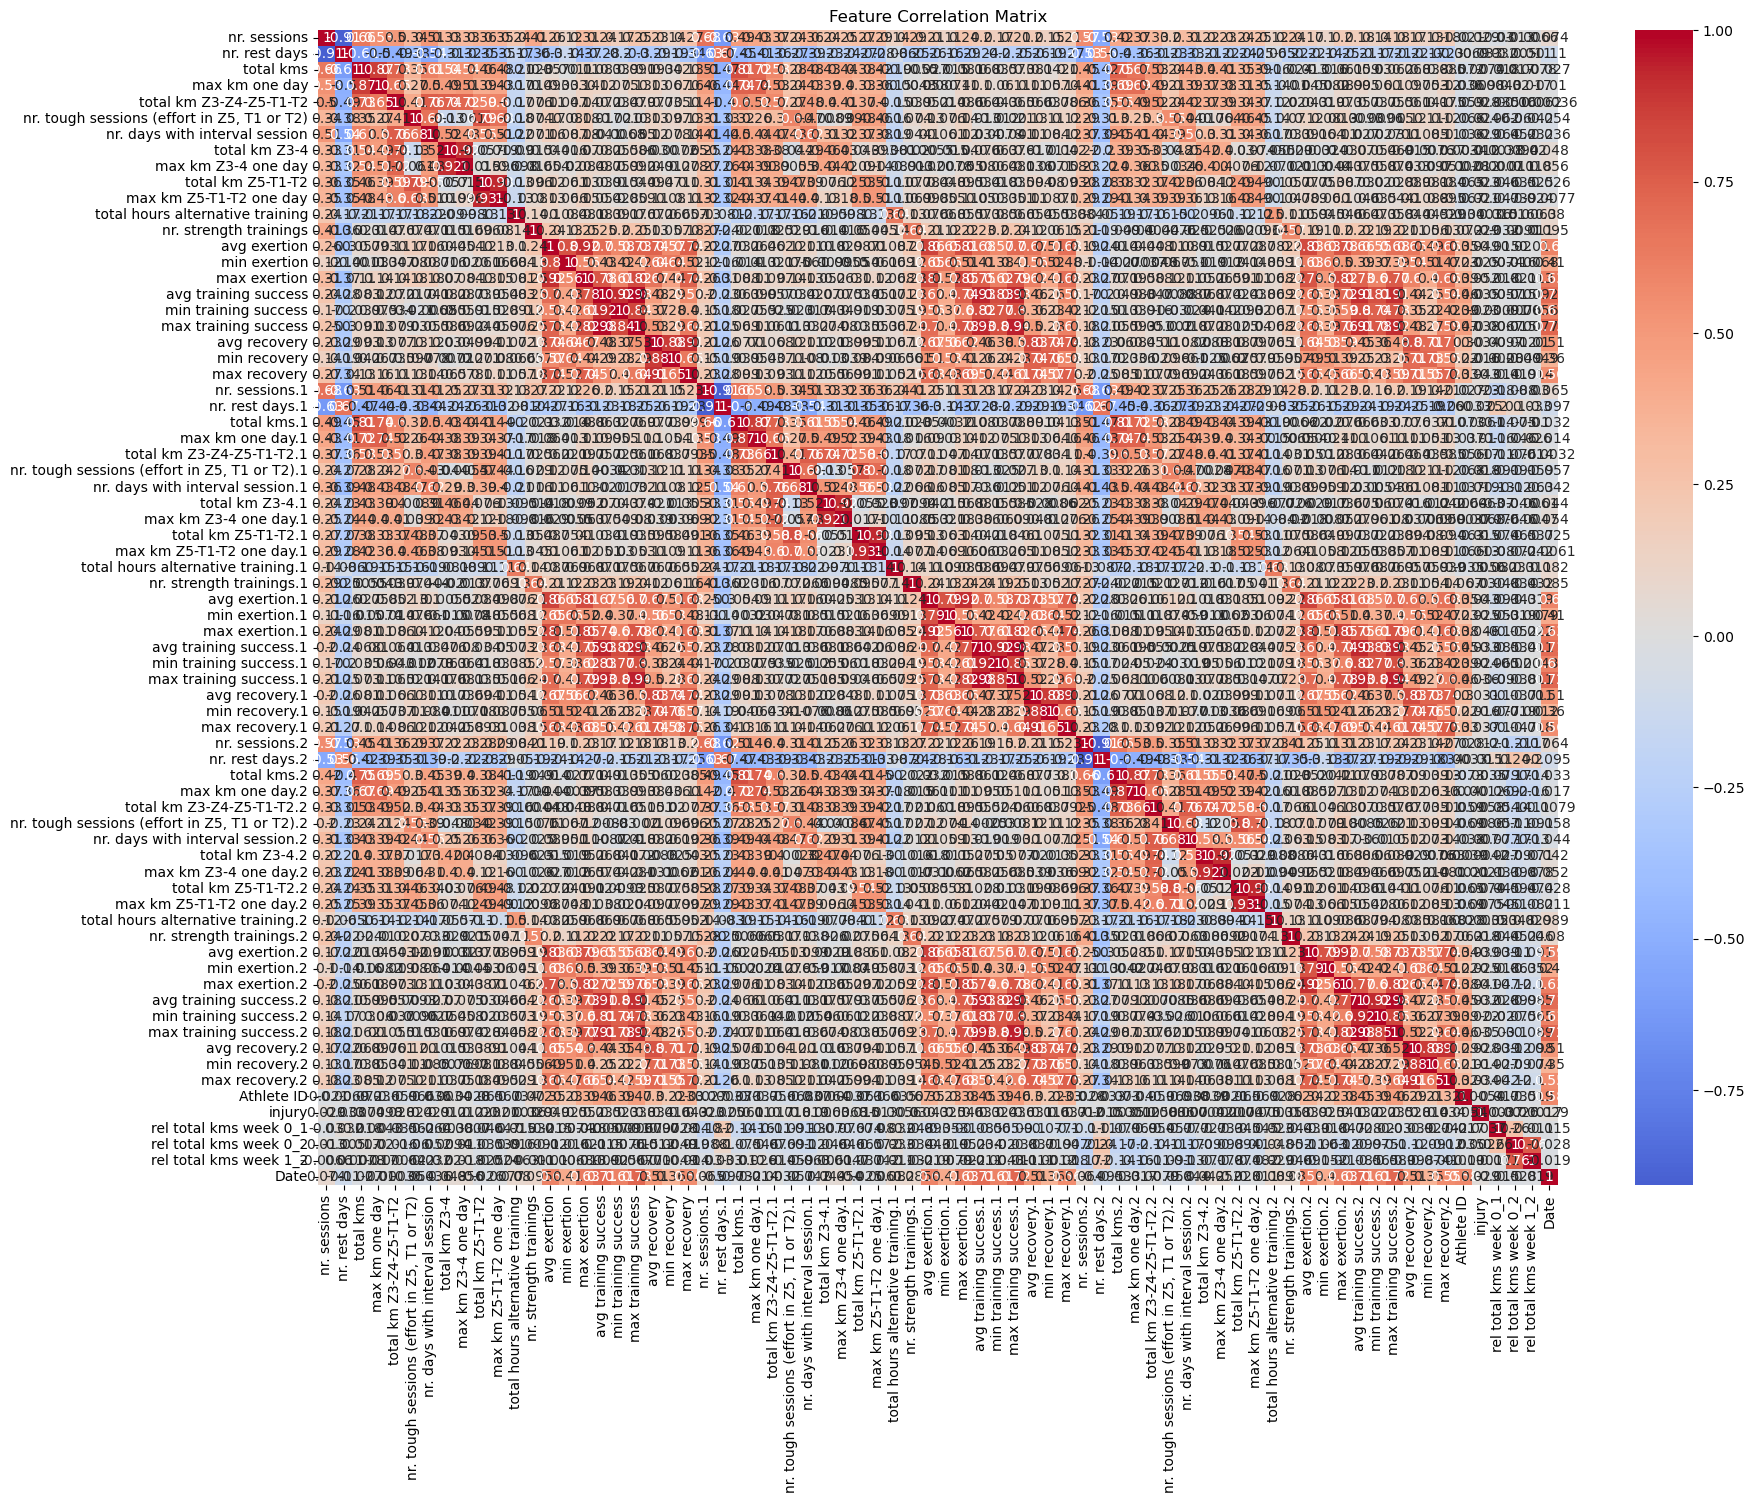

In [42]:
#correlation matrix
plt.figure(figsize=(20, 15))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Feature Correlation Matrix')
plt.show()

In [43]:
#colunm names
for column_name in df.columns:
    print(column_name)

nr. sessions
nr. rest days
total kms
max km one day
total km Z3-Z4-Z5-T1-T2
nr. tough sessions (effort in Z5, T1 or T2)
nr. days with interval session
total km Z3-4
max km Z3-4 one day
total km Z5-T1-T2
max km Z5-T1-T2 one day
total hours alternative training
nr. strength trainings
avg exertion
min exertion
max exertion
avg training success
min training success
max training success
avg recovery
min recovery
max recovery
nr. sessions.1
nr. rest days.1
total kms.1
max km one day.1
total km Z3-Z4-Z5-T1-T2.1
nr. tough sessions (effort in Z5, T1 or T2).1
nr. days with interval session.1
total km Z3-4.1
max km Z3-4 one day.1
total km Z5-T1-T2.1
max km Z5-T1-T2 one day.1
total hours alternative training.1
nr. strength trainings.1
avg exertion.1
min exertion.1
max exertion.1
avg training success.1
min training success.1
max training success.1
avg recovery.1
min recovery.1
max recovery.1
nr. sessions.2
nr. rest days.2
total kms.2
max km one day.2
total km Z3-Z4-Z5-T1-T2.2
nr. tough sessions (ef